In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# IMPORTANDO DADOS
- ax $\Rightarrow$ aceleração no eixo x (g = 10 m/s^2)
- ay $\Rightarrow$ aceleração no eixo y (g = 10 m/s^2)
- az $\Rightarrow$ aceleração no eixo z (g = 10 m/s^2)
- wx $\Rightarrow$ velocidade angular no eixo x (º/s)
- wy $\Rightarrow$ velocidade angular no eixo y (º/s)
- wz $\Rightarrow$ velocidade angular no eixo z (º/s)

In [29]:
df = pd.read_csv('Aquisition/DataBase.csv')
df

,t,ax,ay,az
0,0.002,-61.73534,-51.24376,19.575130
1,0.101,-89.51757,-38.31065,12.150570
2,0.201,-76.58447,-60.10533,-3.417053
3,0.301,-58.62182,-42.14268,4.965515
4,0.401,-52.15527,-32.08360,13.827090
...,...,...,...,...
69,6.903,123.63920,52.22110,-25.930240
70,7.003,232.13360,34.97696,-53.233460
71,7.103,175.61110,110.65960,-2.459045
72,7.203,115.49610,91.97842,-0.303528


In [30]:
df['dt'] = df.t.diff().fillna(0) 
df.head()

,t,ax,ay,az,dt
0,0.002,-61.73534,-51.24376,19.575130,0.000
1,0.101,-89.51757,-38.31065,12.150570,0.099
2,0.201,-76.58447,-60.10533,-3.417053,0.100
3,0.301,-58.62182,-42.14268,4.965515,0.100
4,0.401,-52.15527,-32.08360,13.827090,0.100


# POSIÇÃO LINEAR
$a = \frac{dv}{dt}$

$v = \int_0^t a(t)\, dt$, mas $v = \frac{dx}{dt}$

$\frac{dx}{dt} = \int_0^t a(t)\, dt$

$x = \int_0^t \int_0^t a(t)\, dt\, dt$

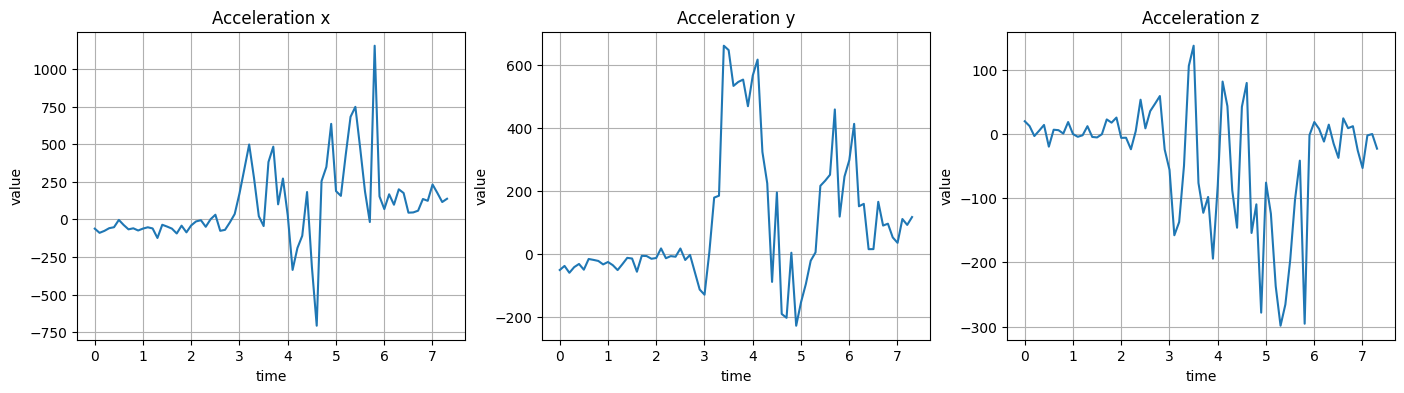

In [31]:
plt.figure(figsize=(17, 4))

plt.subplot(1, 3, 1)
plt.plot(df.t, df.ax)
plt.xlabel('time'), plt.ylabel('value')
plt.title('Acceleration x')
plt.grid()

plt.subplot(1, 3, 2)
plt.plot(df.t, df.ay)
plt.xlabel('time'), plt.ylabel('value')
plt.title('Acceleration y')
plt.grid()

plt.subplot(1, 3, 3)
plt.plot(df.t, df.az)
plt.xlabel('time'), plt.ylabel('value')
plt.title('Acceleration z')
plt.grid()

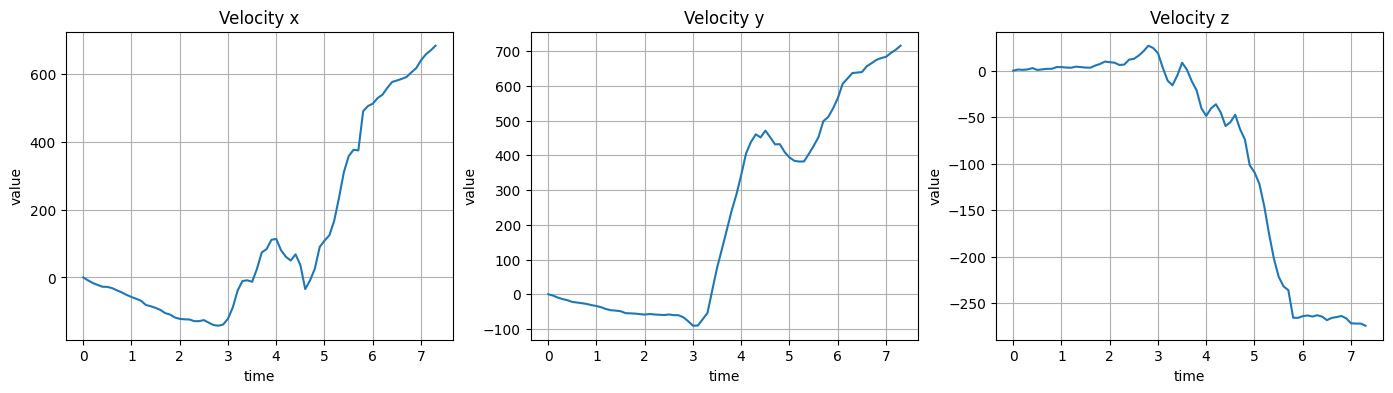

In [32]:
df['vx'] = np.cumsum(df.ax * df.dt)
df['vy'] = np.cumsum(df.ay * df.dt)
df['vz'] = np.cumsum(df.az * df.dt)

plt.figure(figsize=(17, 4))
plt.subplot(1, 3, 1)
plt.plot(df.t, df.vx)
plt.xlabel('time'), plt.ylabel('value')
plt.title('Velocity x')
plt.grid()

plt.subplot(1, 3, 2)
plt.plot(df.t, df.vy)
plt.xlabel('time'), plt.ylabel('value')
plt.title('Velocity y')
plt.grid()

plt.subplot(1, 3, 3)
plt.plot(df.t, df.vz)
plt.xlabel('time'), plt.ylabel('value')
plt.title('Velocity z')
plt.grid()

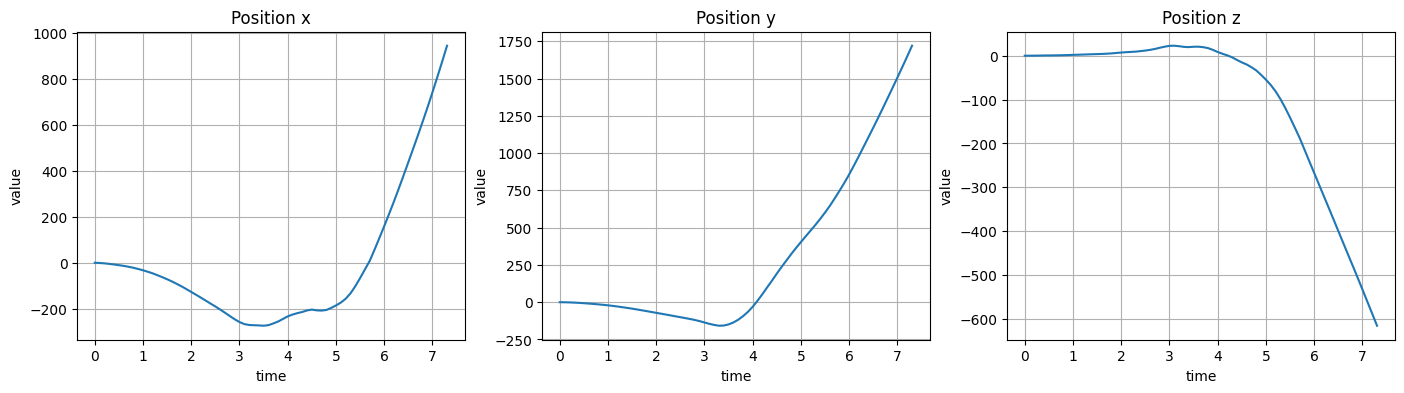

In [33]:
df['x'] = np.cumsum(df.vx * df.dt)
df['y'] = np.cumsum(df.vy * df.dt)
df['z'] = np.cumsum(df.vz * df.dt)

plt.figure(figsize=(17, 4))
plt.subplot(1, 3, 1)
plt.plot(df.t, df.x)
plt.xlabel('time'), plt.ylabel('value')
plt.title('Position x')
plt.grid()

plt.subplot(1, 3, 2)
plt.plot(df.t, df.y)
plt.xlabel('time'), plt.ylabel('value')
plt.title('Position y')
plt.grid()

plt.subplot(1, 3, 3)
plt.plot(df.t, df.z)
plt.xlabel('time'), plt.ylabel('value')
plt.title('Position z')
plt.grid()

# JOINING

In [34]:
df

,t,ax,ay,az,dt,vx,vy,vz,x,y,z
0,0.002,-61.73534,-51.24376,19.575130,0.000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000
1,0.101,-89.51757,-38.31065,12.150570,0.099,-8.862239,-3.792754,1.202906,-0.877362,-0.375483,0.119088
2,0.201,-76.58447,-60.10533,-3.417053,0.100,-16.520686,-9.803287,0.861201,-2.529430,-1.355811,0.205208
3,0.301,-58.62182,-42.14268,4.965515,0.100,-22.382868,-14.017555,1.357753,-4.767717,-2.757567,0.340983
4,0.401,-52.15527,-32.08360,13.827090,0.100,-27.598395,-17.225915,2.740462,-7.527557,-4.480158,0.615029
...,...,...,...,...,...,...,...,...,...,...,...
69,6.903,123.63920,52.22110,-25.930240,0.100,616.748559,679.939524,-266.417849,677.811402,1440.244934,-506.385899
70,7.003,232.13360,34.97696,-53.233460,0.100,639.961919,683.437220,-271.741195,741.807594,1508.588656,-533.560018
71,7.103,175.61110,110.65960,-2.459045,0.100,657.523029,694.503180,-271.987100,807.559897,1578.038974,-560.758728
72,7.203,115.49610,91.97842,-0.303528,0.100,669.072639,703.701022,-272.017452,874.467161,1648.409076,-587.960474


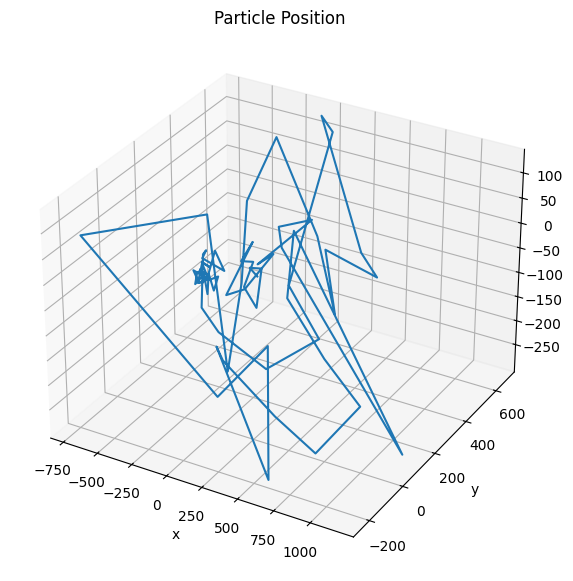

In [35]:
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection='3d')
plt.plot(df.ax, df.ay, df.az)
plt.title('Particle Position')
plt.xlabel('x'), plt.ylabel('y')
plt.show()


In [36]:
df.to_csv('DataBase.csv', index=None)